# US Police Killings
The data set represent shootings of civilians by police in the US. It contains information on each police killing in the US from January 2015 to June 2015.

The goal is to investigates on these shootings.

In [2]:
import pandas as pd
police_killings = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [3]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

In [4]:
count_race = police_killings["raceethnicity"].value_counts()

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Shooting by Race

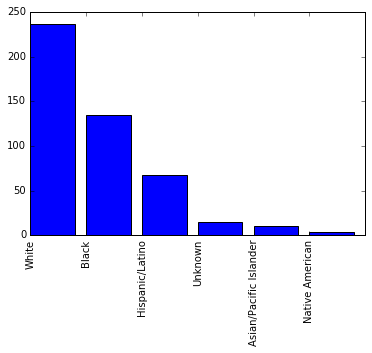

In [6]:
plt.bar(range(6), count_race.values)
plt.xticks(range(6), count_race.index, rotation="vertical")
plt.show()

In [7]:
count_race / sum(count_race)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

# Shootings By Regional Income

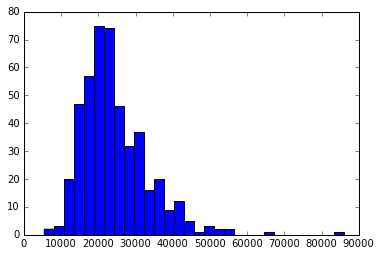

In [8]:
income = police_killings["p_income"][police_killings["p_income"] != '-'].astype('int')
plt.hist(income,bins=30)
plt.show()

In [21]:
police_killings["p_income"][police_killings["p_income"] != '-'].astype('int').median()

22348.0

According to the Census, median personal income in the US is 28,567, and our median is 22,348, which means that shootings tend to happen in less affluent areas. Our sample size is relatively small, though, so it's hard to make conclusions.

# Shootings By State

In [10]:
state_pop = pd.read_csv("state_population.csv")

In [11]:
counts = police_killings["state_fp"].value_counts()
#counts : Pandas Series, where the index is the code for each state, 
#and the values are the numbers of police killings in each state.

In [12]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = state_pop.merge(states, on = "STATE")
# STATE is the common column that both states and state_pop share.

In [13]:
states["pop_millions"] = states["POPESTIMATE2015"]/1000000

In [14]:
states["rate"] = states["shootings"]/states["pop_millions"]

In [15]:
states.sort("rate")

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,shootings,pop_millions,rate
6,40,1,1,9,Connecticut,3590886,2826827,78.7,1,3.590886,0.278483
37,40,1,2,42,Pennsylvania,12802503,10112229,79.0,7,12.802503,0.546768
15,40,2,4,19,Iowa,3123899,2395103,76.7,2,3.123899,0.640226
32,40,1,2,36,New York,19795791,15584974,78.7,13,19.795791,0.656705
21,40,1,1,25,Massachusetts,6794422,5407335,79.6,5,6.794422,0.735898
29,40,1,1,33,New Hampshire,1330608,1066610,80.2,1,1.330608,0.751536
19,40,1,1,23,Maine,1329328,1072948,80.7,1,1.329328,0.752260
13,40,2,3,17,Illinois,12859995,9901322,77.0,11,12.859995,0.855366
34,40,2,3,39,Ohio,11613423,8984946,77.4,10,11.613423,0.861073
45,40,2,3,55,Wisconsin,5771337,4476711,77.6,5,5.771337,0.866350


> States in the midwest and south seem to have the highest police killing rates, whereas those in the northeast seem to have the lowest.

# State By State Differences
### Dive more in the data in order to explain differerences in police killing rate. 

In [36]:
pk = police_killings[(police_killings["share_white"] != "-")
                     & (police_killings["share_black"] != "-")
                     & (police_killings["share_hispanic"] != "-")]

pk["share_white"] = pk["share_white"].astype('float')
pk["share_black"] = pk["share_black"].astype('float')
pk["share_hispanic"] = pk["share_hispanic"].astype('float')

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [56]:
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

ls = pk[pk["state"].isin(lowest_states)]
hs = pk[pk["state"].isin(highest_states)]

### Mean of the Lowest Shooting Rate 

In [65]:
ls[["pop", "county_income",
    "share_white", "share_black", "share_hispanic"]].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

### Mean of the Highest Shooting Rate 

In [66]:
hs[["pop", "county_income",
    "share_white", "share_black", "share_hispanic"]].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

It looks like the states with low rates of shootings tend to have a higher proportion of blacks in the population, and a lower proportion of hispanics in the census regions where the shootings occur. It looks like the income of the counties where the shootings occur is higher.

States with high rates of shootings tend to have high hispanic population shares in the counties where shootings occur.

In [67]:
hs[["pop", "county_income",
    "share_white", "share_black", "share_hispanic"]].describe()

,pop,county_income,share_white,share_black,share_hispanic
count,92.000000,92.000000,92.000000,92.000000,92.000000
mean,4315.750000,48706.967391,55.652174,11.532609,20.693478
std,2063.723609,9839.206872,24.406158,19.591303,20.415690
min,403.000000,25498.000000,2.100000,0.000000,0.000000
25%,2886.000000,42987.000000,39.175000,0.675000,4.350000
50%,4257.500000,48801.000000,58.200000,2.700000,10.850000
75%,5377.000000,53596.000000,74.200000,11.550000,31.725000
max,13561.000000,77454.000000,95.900000,93.100000,81.500000
